In [1]:
from frgpascal.analysis.processing import load_all
import matplotlib.pyplot as plt
from pathlib import Path
import json # load maestro logs
import pandas as pd
import numpy as np

In [2]:
# load a csv file

path = 'data/output/20221011_B9-char_1/'
metrics = pd.read_csv(path + 'fitted_characterization_metrics.csv')
metrics

,Unnamed: 0,pl_intensity_0,pl_peakev_0,pl_fwhm_0,t_bandgap_0,t_samplepresent_0,df_median_0,bf_inhomogeneity_0,name
0,sample0,174.176938,1.677392,0.096823,NaN,True,140.03584,0.154434,sample0
1,sample1,175.216607,1.676216,0.098287,NaN,True,140.84517,0.034818,sample1
2,sample2,253.082279,1.677381,0.097397,NaN,True,140.30478,0.033021,sample2
3,sample3,183.368298,1.677104,0.097168,1.764107,True,139.91630,0.036609,sample3
4,sample4,279.598707,1.677065,0.096425,NaN,True,140.98710,0.031844,sample4
5,sample5,210.086825,1.676960,0.095493,1.854573,True,140.95224,0.123810,sample5
6,sample6,235.359654,1.677107,0.096805,NaN,True,141.80391,0.032335,sample6
7,sample7,160.327952,1.676423,0.096087,1.844298,True,141.10165,0.034108,sample7
8,sample8,176.236739,1.676698,0.098563,NaN,True,140.71817,0.052047,sample8
9,sample9,83.560557,1.677186,0.101346,NaN,True,140.06075,0.036251,sample9


Text(0.5, 0, 'pl_peakev_0')

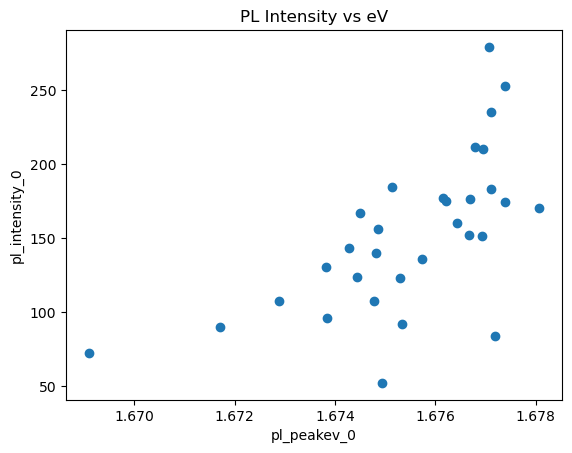

In [6]:
plt.title('PL Intensity vs eV')
plt.scatter(metrics['pl_peakev_0'], metrics['pl_intensity_0'])
plt.ylabel('pl_intensity_0')
plt.xlabel('pl_peakev_0')

Text(0.5, 0, 'Sample Number')

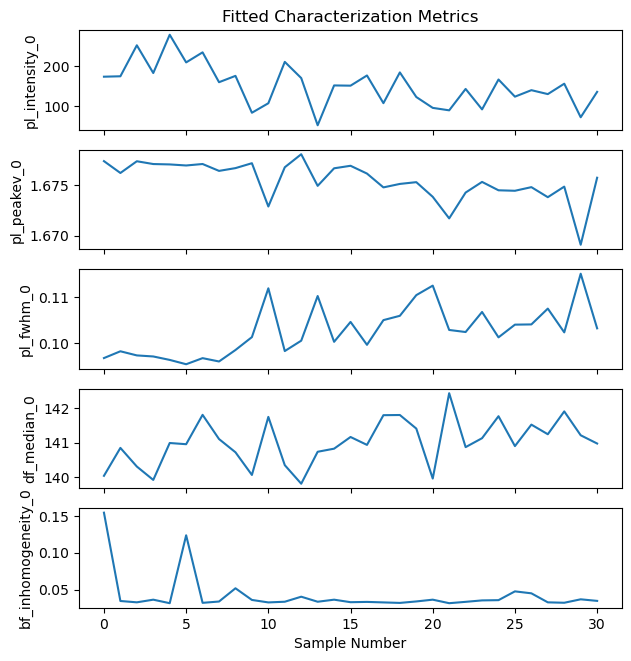

In [7]:
# visualize the change in metrics over time
# note a line graph only makes sense if the samples are indeed sequential

columns = ['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 'df_median_0', 'bf_inhomogeneity_0']
nrows=len(columns)

fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=True, figsize=(7,nrows*1.5))
ax[0].set_title('Fitted Characterization Metrics')

for i in range(nrows):
    plt.subplot(nrows,1,i+1)
    plt.ylabel(columns[i])
    plt.plot(metrics[columns[i]])
plt.xlabel('Sample Number')

In [8]:
from natsort import index_natsorted

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

In [9]:
chardir_0 = 'data/output/20221011_B9-char_1/Characterization/'
metricdf, rawdf = load_all_sorted(chardir_0)

Loading data:   0%|          | 0/31 [00:00<?, ?sample/s]/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:  13%|█▎        | 4/31 [01:29<09:46, 21.73s/sample]/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 31/31 [08:52<00:00, 17.17s/sample]


In [10]:
metricdf.columns

Index(['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 't_bandgap_0',
       't_samplepresent_0', 'df_median_0', 'bf_inhomogeneity_0', 'name'],
      dtype='object')

In [11]:
# determine what type of data
for c in rawdf.columns:
    print(c, type(rawdf[c][0]))
print('pl_0 keys: ' + str(rawdf['pl_0'][0].keys()))
print('pl_0["wl"] shape: ' + str(rawdf['pl_0'][0]['wl'].shape))
print('pl_0["cps"] shape: ' + str(rawdf['pl_0'][0]['cps'].shape))

print('t_0 keys: ' + str(rawdf['t_0'][0].keys()))
print('t_0["wl"] shape: ' + str(rawdf['t_0'][0]['wl'].shape))
print('t_0["t"] shape: ' + str(rawdf['t_0'][0]['t'].shape))
print('t_0["a"] shape: ' + str(rawdf['t_0'][0]['a'].shape))

print('df_0 shape: ' + str(rawdf['df_0'][0].shape))
print('bf_0 shape: ' + str(rawdf['bf_0'][0].shape))
print('plimg_0 shape: ' + str(rawdf['plimg_0'][0].shape))

rawdf.head(1)

pl_0 <class 'dict'>
t_0 <class 'dict'>
df_0 <class 'numpy.ndarray'>
bf_0 <class 'numpy.ndarray'>
plimg_0 <class 'numpy.ndarray'>
name <class 'str'>
pl_0 keys: dict_keys(['wl', 'cps'])
pl_0["wl"] shape: (2048,)
pl_0["cps"] shape: (2048,)
t_0 keys: dict_keys(['wl', 't', 'a'])
t_0["wl"] shape: (2047,)
t_0["t"] shape: (2047,)
t_0["a"] shape: (2047,)
df_0 shape: (1080, 1440, 3)
bf_0 shape: (1080, 1440, 3)
plimg_0 shape: (1080, 1440, 3)


,pl_0,t_0,df_0,bf_0,plimg_0,name
0,"{'wl': [178.95, 179.38, 179.8, 180.23, 180.65,...","{'wl': [179.38, 179.8, 180.23, 180.65, 181.08,...","[[[96.16787, 57.04131, 0.0], [96.99463, 56.334...","[[[0.6191406, 0.53027344, 0.6425781], [0.59277...","[[[0.81152344, 0.61328125, 0.0], [0.85058594, ...",sample0


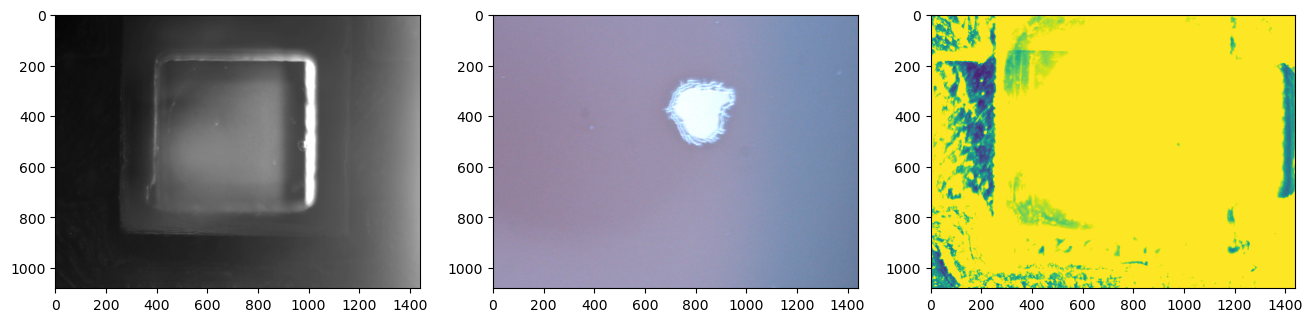

In [12]:
# plot images

fig, ax = plt.subplots(1,3, figsize=(16,10))
i=0

ax[0].imshow(rawdf['df_0'][i][:,:,0], cmap='gray')
ax[1].imshow(rawdf['bf_0'][i])
ax[2].imshow(rawdf['plimg_0'][i][:,:,0]) # use red channel for PL measurements, since that's what bandgap energy is

140.84126 26.892319
85.73483 17.225231
0.0011816126 0.1946009
0.5712739 0.085066214
0.570922 0.07476639
0.69527674 0.064545
0.9703122 0.07630386
0.80558544 0.18215704
0.31059644 0.28208268


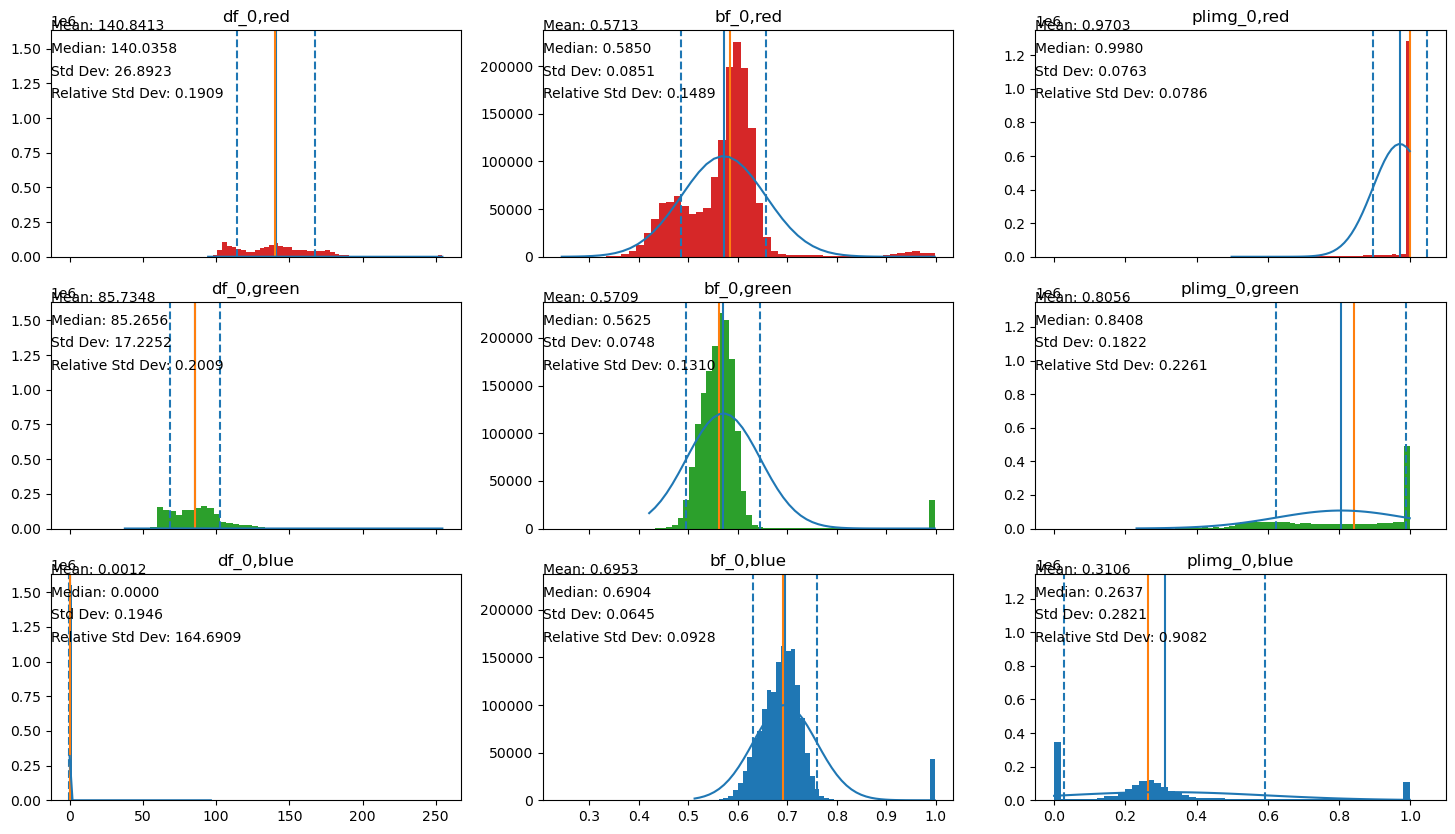

In [13]:
# plot histograms showing image rgb channel intensities
from scipy.stats import norm

n_bins = 50
fig, ax = plt.subplots(3,3, figsize=(18,10), sharex='col', sharey='col')

imgs = ['df_0','bf_0','plimg_0']
channel_names = ['red','green','blue']
colors = ['tab:red','tab:green','tab:blue']

for x in range(3):
    for y in range(3):
        # compute stats on the channel
        channel = rawdf[imgs[x]][i][:,:,y].flatten()
        mean = np.mean(channel)
        median = np.median(channel)
        std = np.std(channel)
        rsd = std / mean # coefficient of variation / relative standard deviation

        # now plot data
        ax[y,x].set_title(f'{imgs[x]},{channel_names[y]}')
        hist, bins, _ = ax[y,x].hist(
            channel,
            bins=n_bins,
            color=colors[y]
            )
        ax[y,x].annotate(f'Mean: {mean:.4f}', (0,1), xycoords='axes fraction')
        ax[y,x].annotate(f'Median: {median:.4f}', (0,0.9), xycoords='axes fraction')
        ax[y,x].annotate(f'Std Dev: {std:.4f}', (0,0.8), xycoords='axes fraction')
        ax[y,x].annotate(f'Relative Std Dev: {rsd:.4f}', (0,0.7), xycoords='axes fraction')

        ax[y,x].axvline(mean)
        ax[y,x].axvline(mean+std, linestyle='--')
        ax[y,x].axvline(mean-std, linestyle='--')
        ax[y,x].axvline(median, color='tab:orange')

        # try fitting a gaussian curve to the channel distribution
        mu, sigma = norm.fit(channel)
        print(mu, sigma)
        xpdf = np.linspace(np.min(channel), np.max(channel))
        ypdf = norm.pdf(xpdf, mu, sigma) * np.max(hist)/10
        ax[y,x].plot(xpdf, ypdf)

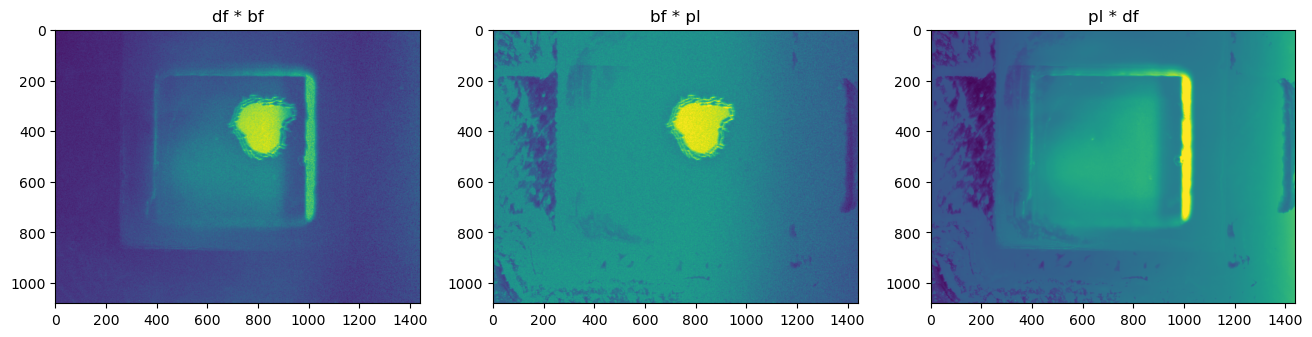

In [14]:
# try overlaying bf/df/pl images to see how it looks

# try each of the 3 possible two-image combinations
# for now the "filter" is simple multiplication
fig, ax = plt.subplots(1,3, figsize=(16,10))

ax[0].set_title('df * bf')
ax[1].set_title('bf * pl')
ax[2].set_title('pl * df')

ax[0].imshow(rawdf['df_0'][i][:,:,0] * rawdf['bf_0'][i][:,:,0]) # df * bf
ax[1].imshow(rawdf['bf_0'][i][:,:,0] * rawdf['plimg_0'][i][:,:,0]) # bf * pl
ax[2].imshow(rawdf['plimg_0'][i][:,:,0] * rawdf['df_0'][i][:,:,0]) # pl * df

2022-10-16 11:23:51.352333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 11:23:51.356847: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [

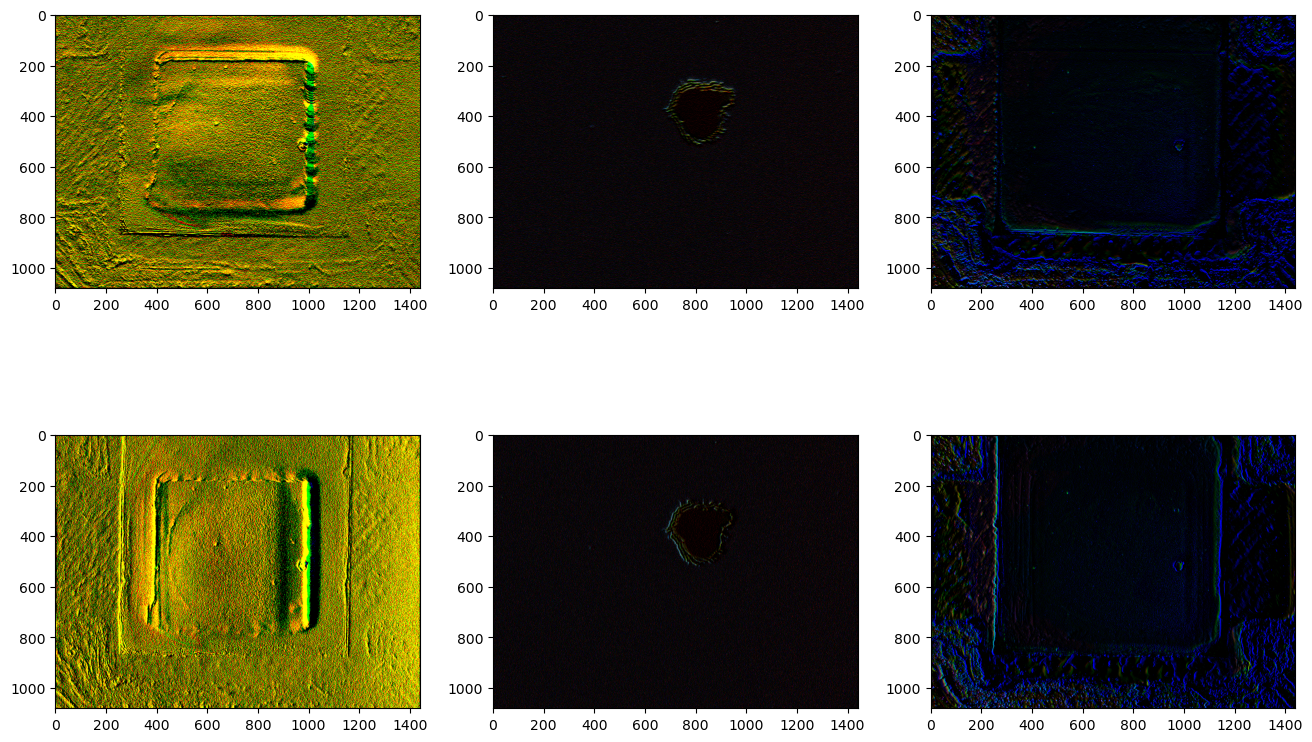

In [15]:
import tensorflow as tf
# try sobel edge detection to show defects

img_df = tf.cast(rawdf['df_0'][i], dtype=tf.float32) # cast to tensorflow tensor
img_df = tf.expand_dims(img_df, 0) # expand dimensions to get in format for tf processing
sobel_df = tf.nn.relu(tf.image.sobel_edges(img_df)) # apply sobel filter and rectify

img_bf = tf.cast(rawdf['bf_0'][i], dtype=tf.float32) # cast to tensorflow tensor
img_bf = tf.expand_dims(img_bf, 0) # expand dimensions to get in format for tf processing
sobel_bf = tf.nn.relu(tf.image.sobel_edges(img_bf))

img_pl = tf.cast(rawdf['plimg_0'][i], dtype=tf.float32) # cast to tensorflow tensor
img_pl = tf.expand_dims(img_pl, 0) # expand dimensions to get in format for tf processing
sobel_pl = tf.nn.relu(tf.image.sobel_edges(img_pl))

# now show edge images
fig, ax = plt.subplots(2,3, figsize=(16,10))
ax[0,0].imshow(tf.squeeze(sobel_df)[:,:,:,0]) # display horizontal edges on top row
ax[1,0].imshow(tf.squeeze(sobel_df)[:,:,:,1]) # then vertical edges on bottom row
ax[0,1].imshow(tf.squeeze(sobel_bf)[:,:,:,0])
ax[1,1].imshow(tf.squeeze(sobel_bf)[:,:,:,1])
ax[0,2].imshow(tf.squeeze(sobel_pl)[:,:,:,0])
ax[1,2].imshow(tf.squeeze(sobel_pl)[:,:,:,1])

(1, 1080, 1440, 3, 2)
1.2145144 2.5370822
(1, 1080, 1440, 3, 2)
0.8807167 1.933659
(1, 1080, 1440, 3, 2)
0.003826387 0.54424
(1, 1080, 1440, 3, 2)
0.04207829 0.06695403
(1, 1080, 1440, 3, 2)
0.02572262 0.041929234
(1, 1080, 1440, 3, 2)
0.035409987 0.05716434
(1, 1080, 1440, 3, 2)
0.008632445 0.038234144
(1, 1080, 1440, 3, 2)
0.022828706 0.055488463
(1, 1080, 1440, 3, 2)
0.0808033 0.21741949


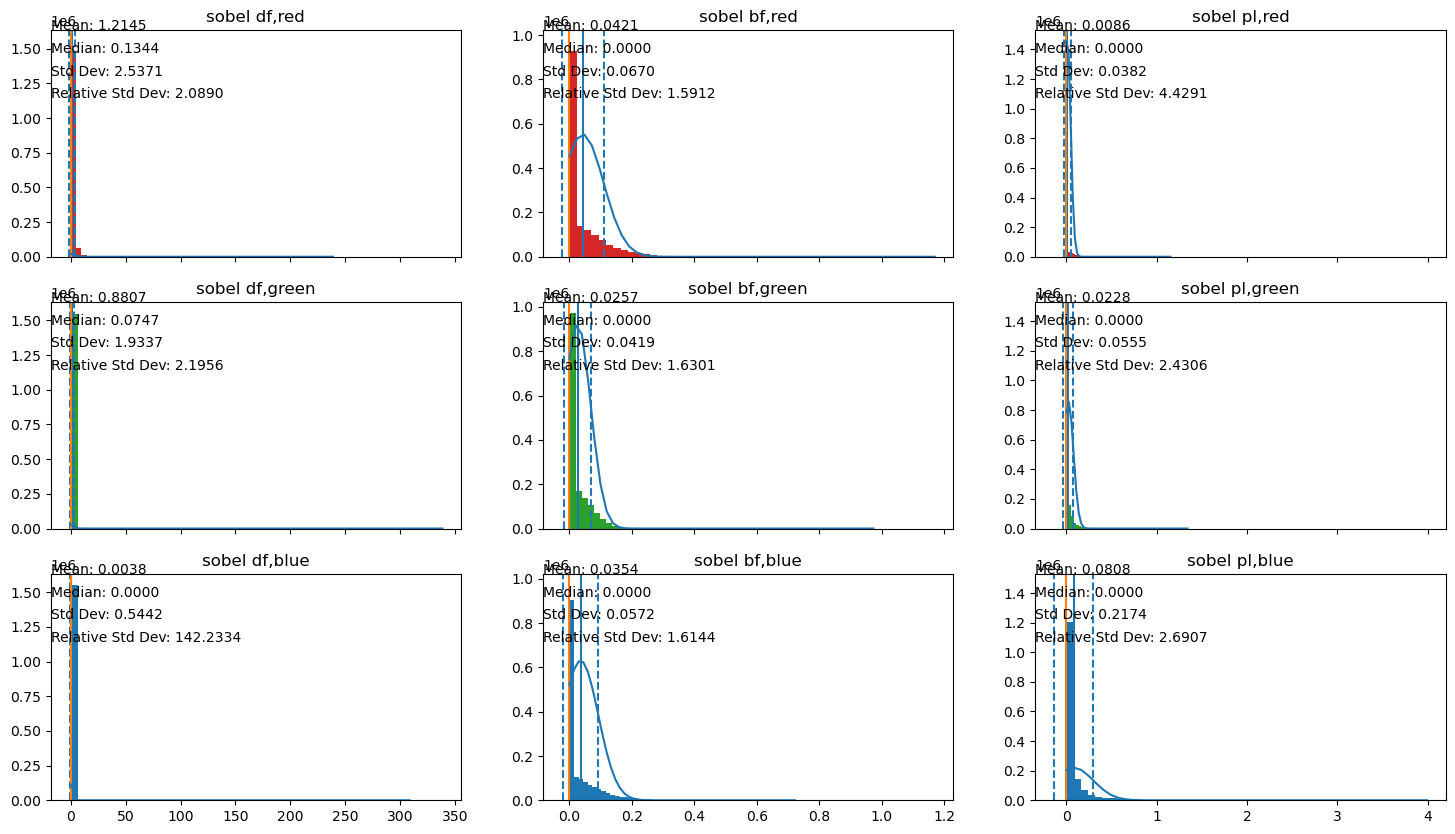

In [16]:
# compare channel histograms before and after sobel operation
# plot histograms showing image rgb channel intensities
from scipy.stats import norm

n_bins = 50
fig, ax = plt.subplots(3,3, figsize=(18,10), sharex='col', sharey='col')

titles = ['sobel df', 'sobel bf', 'sobel pl']
imgs = [sobel_df, sobel_bf, sobel_pl]
channel_names = ['red','green','blue']
colors = ['tab:red','tab:green','tab:blue']

for x in range(3):
    for y in range(3):
        # compute stats on the channel
        print(imgs[x].shape)
        channel = tf.squeeze(imgs[x])[:,:,y,0].numpy().flatten()
        mean = np.mean(channel)
        median = np.median(channel)
        std = np.std(channel)
        rsd = std / mean # coefficient of variation / relative standard deviation

        # now plot data
        ax[y,x].set_title(f'{titles[x]},{channel_names[y]}')
        hist, bins, _ = ax[y,x].hist(
            channel,
            bins=n_bins,
            color=colors[y]
            )
        ax[y,x].annotate(f'Mean: {mean:.4f}', (0,1), xycoords='axes fraction')
        ax[y,x].annotate(f'Median: {median:.4f}', (0,0.9), xycoords='axes fraction')
        ax[y,x].annotate(f'Std Dev: {std:.4f}', (0,0.8), xycoords='axes fraction')
        ax[y,x].annotate(f'Relative Std Dev: {rsd:.4f}', (0,0.7), xycoords='axes fraction')

        ax[y,x].axvline(mean)
        ax[y,x].axvline(mean+std, linestyle='--')
        ax[y,x].axvline(mean-std, linestyle='--')
        ax[y,x].axvline(median, color='tab:orange')

        # try fitting a gaussian curve to the channel distribution
        mu, sigma = norm.fit(channel)
        print(mu, sigma)
        xpdf = np.linspace(np.min(channel), np.max(channel))
        ypdf = norm.pdf(xpdf, mu, sigma) * np.max(hist)/10
        ax[y,x].plot(xpdf, ypdf)

Text(0.5, 1.0, 'PL and Transmission Spectra')

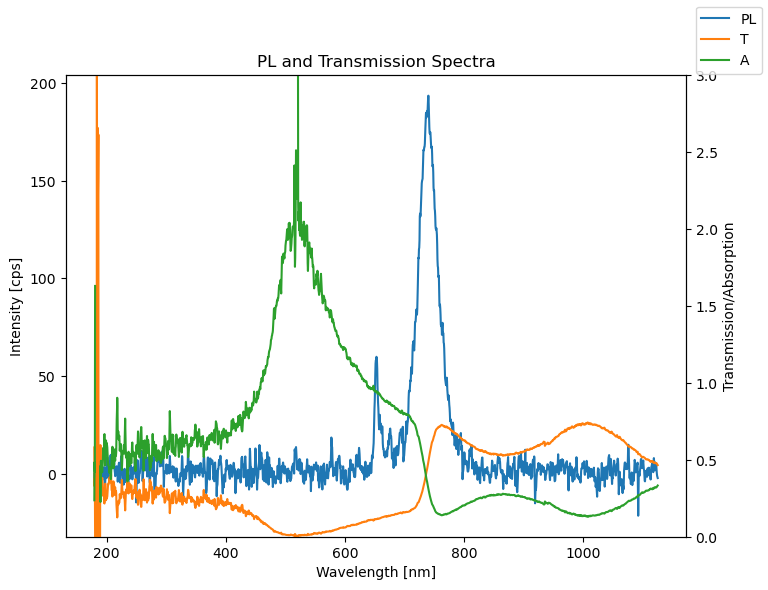

In [17]:
# plot the pl and transmission spectra

fig, ax_pl = plt.subplots(figsize=(8,6))
ax_pl.plot(rawdf['pl_0'][i]['wl'], rawdf['pl_0'][i]['cps'])
ax_pl.set_xlabel('Wavelength [nm]')
ax_pl.set_ylabel('Intensity [cps]')

ax_t = ax_pl.twinx()
ax_t.set_ylabel('Transmission/Absorption')

ax_t.set_ylim(0, 3)
ax_t.plot(rawdf['t_0'][i]['wl'], rawdf['t_0'][i]['t'], color='tab:orange')
ax_t.plot(rawdf['t_0'][i]['wl'], rawdf['t_0'][i]['a'], color='tab:green')

fig.legend(['PL', 'T', 'A'])
plt.title('PL and Transmission Spectra')

# Read Input

In [15]:
import os
import glob
import regex

# now get the input (sampledataframe, maestro_netlist, stocksolutions)
# TODO: find a way to automatically pair input with output folder

inputdir_0 = 'data/input/'

sampledf_files = glob.glob(os.path.join(inputdir_0, '**/sampledataframe*.csv'), recursive=True)
solution_files = glob.glob(os.path.join(inputdir_0, '**/stocksolutions*.csv'), recursive=True)
print(sampledf_files)
print(solution_files)

# place all sample input file data into one dataframe
sample_input_df = None
for f in sampledf_files:
    filename = f[len(inputdir_0):]
    file_df = pd.read_csv(f)
    file_df.insert(0, 'file', filename, allow_duplicates=True) # record the file this data came from
    sample_input_df = pd.concat([sample_input_df, file_df])

# place all solution input file data into one dataframe
solution_input_df = None
for f in solution_files:
    filename = f[len(inputdir_0):]
    file_df = pd.read_csv(f)
    file_df.insert(0, 'file', filename, allow_duplicates=True) # record the file this data came from
    solution_input_df = pd.concat([solution_input_df, file_df])

['data/input/20220414_Film_PL_Check/sampledataframe_WBG Molecular Sieve Dried Solvent.csv', 'data/input/20220428_Excess_PbI2/sampledataframe_PbX2 Loading Optimization.csv', 'data/input/20220502_Excess_PbI2/sampledataframe_PbX2 Loading Optimization.csv', 'data/input/20220503_Drop_optimization/sampledataframe_Drop_optimization.csv', 'data/input/20220504_PIN_Half_Cells/sampledataframe_20220504_PIN_Half_Cells.csv', 'data/input/20220505_Annealing_Optimization/sampledataframe_20220505_Annealing_Optimization.csv', 'data/input/20220506_P3AT_Spin_Optimization/sampledataframe_20220506_P3AT_Spin_Optimization.csv', 'data/input/20220506_PL_Holdout/sampledataframe_PL_Holdout_halfcells.csv', 'data/input/20220510_3xHalide_MACl_films/sampledataframe_20220510_3xHalide_MACl_films.csv', 'data/input/20220510_3xHalide_MACl_films/demo/sampledataframe_20220504_PIN_Half_Cells.csv', 'data/input/20220510_3xHalide_MACl_halfcells/sampledataframe_20220510_3xHalide_MACl_halfcells.csv', 'data/input/20220510_3xHalide_

In [16]:
sample_input_df

,file,Unnamed: 0,name,storage_tray,storage_slot,substrate,worklist,spincoat0_drop0_time,spincoat0_drop0_height,spincoat0_drop0_rate,...,spincoat4_drop1_solvent_dict,spincoat2_drop1_time,spincoat2_drop1_height,spincoat2_drop1_rate,spincoat2_drop1_volume,spincoat2_drop1_molarity,spincoat2_drop1_solutes,spincoat2_drop1_solutes_dict,spincoat2_drop1_solvent,spincoat2_drop1_solvent_dict
0,20220414_Film_PL_Check/sampledataframe_WBG Mol...,0,sample0,Tray1,A1,glass,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-1.0,2.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20220414_Film_PL_Check/sampledataframe_WBG Mol...,1,sample1,Tray1,A2,glass,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-1.0,2.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20220414_Film_PL_Check/sampledataframe_WBG Mol...,2,sample2,Tray1,A3,glass,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-1.0,2.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20220414_Film_PL_Check/sampledataframe_WBG Mol...,3,sample3,Tray1,A4,glass,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-1.0,2.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20220414_Film_PL_Check/sampledataframe_WBG Mol...,4,sample4,Tray1,A5,glass,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-1.0,2.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,20221015_3A3X_B10/B10_2_Char/sampledataframe_B...,26,sample26,Tray2,F2,PSK,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,20221015_3A3X_B10/B10_2_Char/sampledataframe_B...,27,sample27,Tray2,F3,PSK,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,20221015_3A3X_B10/B10_2_Char/sampledataframe_B...,28,sample28,Tray2,F4,PSK,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,20221015_3A3X_B10/B10_2_Char/sampledataframe_B...,29,sample29,Tray2,F5,PSK,"[{""name"": ""characterize"", ""start"": NaN, ""id"": ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sample_input_df[sample_input_df['task'] == 'psk']

,task,Unnamed: 0,name,storage_tray,storage_slot,substrate,worklist,spincoat0_drop0_time,spincoat0_drop0_height,spincoat0_drop0_rate,...,spincoat0_drop0_solvent_dict,spincoat0_drop1_time,spincoat0_drop1_height,spincoat0_drop1_rate,spincoat0_drop1_volume,spincoat0_drop1_molarity,spincoat0_drop1_solutes,spincoat0_drop1_solutes_dict,spincoat0_drop1_solvent,spincoat0_drop1_solvent_dict
0,psk,0,sample0,Tray2,A1,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
1,psk,1,sample1,Tray2,A2,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
2,psk,2,sample2,Tray2,A3,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
3,psk,3,sample3,Tray2,A4,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
4,psk,4,sample4,Tray2,A5,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
5,psk,5,sample5,Tray2,B1,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
6,psk,6,sample6,Tray2,B2,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
7,psk,7,sample7,Tray2,B3,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
8,psk,8,sample8,Tray2,B4,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"
9,psk,9,sample9,Tray2,B5,HTL,"[{""name"": ""spincoat"", ""start"": NaN, ""id"": ""spi...",-5.0,2.0,80.0,...,"{""DMF"": 0.75, ""DMSO"": 0.25}",30.0,0.5,450.0,75.0,0.0,NaN,{},MethylAcetate,"{""MethylAcetate"": 1.0}"


In [12]:
solution_input_df

,file,Labware,Well,Volume (uL),Solutes,Molarity (M),Solvent
0,data/input/20220414_Film_PL_Check/stocksolutio...,4mL_Tray1,A1,140,"{'FA': 0.9359999999999999, 'Cs': 0.20400000000...",1.200,"{'DMF': 0.75, 'DMSO': 0.25}"
1,data/input/20220414_Film_PL_Check/stocksolutio...,4mL_Tray1,D1,650,{},0.000,{'MethylAcetate': 1.0}
2,data/input/20220414_Film_PL_Check/stocksolutio...,4mL_Tray1,A2,140,"{'FA': 0.9359999999999999, 'Cs': 0.264, 'Pb': ...",1.200,"{'DMF': 0.6, 'DMSO': 0.2, 'b': 0.2}"
0,data/input/20220428_Excess_PbI2/stocksolutions...,96wellplate,A1,Empty Vial,"{'FA': 0.9359999999999999, 'Cs': 0.20400000000...",1.200,"{'DMF': 0.75, 'DMSO': 0.25}"
1,data/input/20220428_Excess_PbI2/stocksolutions...,96wellplate,A2,Empty Vial,"{'FA': 0.9359999999999999, 'Cs': 0.20400000000...",1.200,"{'DMF': 0.75, 'DMSO': 0.25}"
...,...,...,...,...,...,...,...
1,data/input/20221015_3A3X_B10/B10_0_HTL/stockso...,15mL_Tray1,B4,1380,"{'SAMS': 0.002, 'HTL': 0.002}",0.002,{'Ethanol': 1.0}
2,data/input/20221015_3A3X_B10/B10_0_HTL/stockso...,15mL_Tray1,A4,Empty Vial,{'Xu-Recipe-PSK': 1.4},1.400,"{'DMF': 0.75, 'DMSO': 0.25}"
0,data/input/20221015_3A3X_B10/B10_1_PSK/stockso...,15mL_Tray1,C4,2425.0,{},0.000,{'MethylAcetate': 1.0}
1,data/input/20221015_3A3X_B10/B10_1_PSK/stockso...,15mL_Tray1,B4,Empty Vial,"{'SAMS': 0.002, 'HTL': 0.002}",0.002,{'Ethanol': 1.0}


In [50]:
pd.read_json(sample_input_df[sample_input_df['task'] == 'psk']['worklist'][0])

,name,start,id,details,sample,precedent
0,spincoat,NaN,spincoat-629e30b6-d704-4c95-8889-df0217c21147,"{'steps': [{'rpm': 5000.0, 'acceleration': 200...",sample0,NaN
1,anneal,NaN,anneal-f3d3edf3-54fe-46ab-8c62-222ee638d4cf,"{'temperature': 110, 'duration': 1800, 'hotpla...",sample0,NaN
2,rest,NaN,rest-fbbb20d6-a4e9-4d8c-96cd-a5165ac2bbd0,{'duration': 300},sample0,NaN


In [ ]:
# parse characterization worklist json
worklist = pd.concat([pd.read_json(x) for x in sampledfs['char']['worklist']])
worklist.index = worklist.index.rename('step_num')

worklist

,name,start,id,details,sample,precedent,duration
step_num,,,,,,,
0,characterize,NaN,characterize-300bae59-50a1-41d3-a91b-a1c7dd2c2114,{'characterization_tasks': [{'name': 'PL_635nm...,sample0,NaN,131
0,characterize,NaN,characterize-534033d0-bb7c-4fb6-a23d-ae13b0a56d57,{'characterization_tasks': [{'name': 'PL_635nm...,sample1,NaN,131
0,characterize,NaN,characterize-f3bf0c0e-d31e-48b2-b63b-3bb437f3ddd0,{'characterization_tasks': [{'name': 'PL_635nm...,sample2,NaN,131
0,characterize,NaN,characterize-ee8a25b4-a784-49a1-a675-60728da0ec7f,{'characterization_tasks': [{'name': 'PL_635nm...,sample3,NaN,131
0,characterize,NaN,characterize-9af9e5db-ec0e-4626-b045-ba93da6351a7,{'characterization_tasks': [{'name': 'PL_635nm...,sample4,NaN,131
0,characterize,NaN,characterize-a1e9d0f7-7b07-49af-b792-5538863dcbb2,{'characterization_tasks': [{'name': 'PL_635nm...,sample5,NaN,131
0,characterize,NaN,characterize-4deb48fe-6737-4e19-950a-a3867d798132,{'characterization_tasks': [{'name': 'PL_635nm...,sample6,NaN,131
0,characterize,NaN,characterize-c3d1a4bf-6492-4f5a-976a-1a873c582874,{'characterization_tasks': [{'name': 'PL_635nm...,sample7,NaN,131
0,characterize,NaN,characterize-002cbaed-a045-4139-aaa3-5fd7af3ed35a,{'characterization_tasks': [{'name': 'PL_635nm...,sample8,NaN,131


In [ ]:
# parse characterization worklist details
details = pd.concat([
    pd.DataFrame.from_dict(worklist['details'].values[i]['characterization_tasks'], orient='columns')
        for i in range(len(worklist))
    ])
details.index.name = 'Step'
details #TODO: join with sample number

,name,station,position,duration,details
Step,,,,,
0,PL_635nm,pl_red,286.0,25.32,"{'exposure_times': [0.1, 5, 20], 'num_scans': 1}"
1,Transmission,transmission,286.0,46.54,"{'exposure_times': [0.02, 0.05, 0.2, 1, 5, 15]..."
2,PLImaging,pl_imaging,82.0,6.25,"{'exposure_times': [0.05, 0.2, 1, 5], 'num_fra..."
3,Darkfield,darkfield,82.0,2.50,"{'exposure_time': 0.05, 'num_frames': 50}"
4,Brightfield,brightfield,164.4,0.05,"{'exposure_time': 0.05, 'num_frames': 1}"
...,...,...,...,...,...
0,PL_635nm,pl_red,286.0,25.32,"{'exposure_times': [0.1, 5, 20], 'num_scans': 1}"
1,Transmission,transmission,286.0,46.54,"{'exposure_times': [0.02, 0.05, 0.2, 1, 5, 15]..."
2,PLImaging,pl_imaging,82.0,6.25,"{'exposure_times': [0.05, 0.2, 1, 5], 'num_fra..."
